<a href="https://colab.research.google.com/github/deebtarmizi104/Vehicle-Fuel-Economy-Estimation-1984-2022-Data-Analysis-/blob/main/Vehicle_Fuel_Economy_Estimation_1984_2022_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install java
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark 
! wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar -xvf spark-3.2.0-bin-hadoop3.2.tgz

!pip install -q findspark

spark-3.2.0-bin-hadoop3.2/
spark-3.2.0-bin-hadoop3.2/NOTICE
spark-3.2.0-bin-hadoop3.2/kubernetes/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/python_executable_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/autoscale.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning_cleanup.py
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/decom.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.2.0-bin-hadoop3.2/kubernetes/docker

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

# Import Packages

In [3]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.functions import count
from pyspark.sql.functions import when
from pyspark.sql.functions import col
from pyspark.sql.functions import lit
from pyspark.sql.functions import concat
from pyspark.sql.functions import regexp_replace

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
spark = SparkSession\
        .builder\
        .appName("BDATest1")\
        .getOrCreate()

In [5]:
path = "dataset/vehicles.csv"

fuel = spark.read.csv(path, header="true")

In [6]:
fuel.take(5)

[Row(barrels08='15.695714285714287', barrelsA08='0.0', charge120='0.0', charge240='0.0', city08='19', city08U='0.0', cityA08='0', cityA08U='0.0', cityCD='0.0', cityE='0.0', cityUF='0.0', co2='-1', co2A='-1', co2TailpipeAGpm='0.0', co2TailpipeGpm='423.1904761904762', comb08='21', comb08U='0.0', combA08='0', combA08U='0.0', combE='0.0', combinedCD='0.0', combinedUF='0.0', cylinders='4', displ='2.0', drive='Rear-Wheel Drive', engId='9011', eng_dscr='(FFS)', feScore='-1', fuelCost08='2350', fuelCostA08='0', fuelType='Regular', fuelType1='Regular Gasoline', ghgScore='-1', ghgScoreA='-1', highway08='25', highway08U='0.0', highwayA08='0', highwayA08U='0.0', highwayCD='0.0', highwayE='0.0', highwayUF='0.0', hlv='0', hpv='0', id='1', lv2='0', lv4='0', make='Alfa Romeo', model='Spider Veloce 2000', mpgData='Y', phevBlended='false', pv2='0', pv4='0', range='0', rangeCity='0.0', rangeCityA='0.0', rangeHwy='0.0', rangeHwyA='0.0', trany='Manual 5-spd', UCity='23.3333', UCityA='0.0', UHighway='35.0',

In [7]:
fuel.printSchema()

root
 |-- barrels08: string (nullable = true)
 |-- barrelsA08: string (nullable = true)
 |-- charge120: string (nullable = true)
 |-- charge240: string (nullable = true)
 |-- city08: string (nullable = true)
 |-- city08U: string (nullable = true)
 |-- cityA08: string (nullable = true)
 |-- cityA08U: string (nullable = true)
 |-- cityCD: string (nullable = true)
 |-- cityE: string (nullable = true)
 |-- cityUF: string (nullable = true)
 |-- co2: string (nullable = true)
 |-- co2A: string (nullable = true)
 |-- co2TailpipeAGpm: string (nullable = true)
 |-- co2TailpipeGpm: string (nullable = true)
 |-- comb08: string (nullable = true)
 |-- comb08U: string (nullable = true)
 |-- combA08: string (nullable = true)
 |-- combA08U: string (nullable = true)
 |-- combE: string (nullable = true)
 |-- combinedCD: string (nullable = true)
 |-- combinedUF: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- displ: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- 

In [8]:
fuel.describe().show()

+-------+--------------------+------------------+---------+-------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+----------------+------------------+------------------+------------------+------------------+------------------+--------------------+----------------+------------------+-------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+----------+------------------+-------+-----------+-----------------+------------------+------------------+---------

In [9]:
fuel.count()

44668

In [10]:
fuel.select("barrels08").count()

44668

In [11]:
fuel.select([count(when(col("barrels08").isNull(),True))]).show()

+--------------------------------------------------+
|count(CASE WHEN (barrels08 IS NULL) THEN true END)|
+--------------------------------------------------+
|                                                 0|
+--------------------------------------------------+



In [12]:
fuel.dtypes

[('barrels08', 'string'),
 ('barrelsA08', 'string'),
 ('charge120', 'string'),
 ('charge240', 'string'),
 ('city08', 'string'),
 ('city08U', 'string'),
 ('cityA08', 'string'),
 ('cityA08U', 'string'),
 ('cityCD', 'string'),
 ('cityE', 'string'),
 ('cityUF', 'string'),
 ('co2', 'string'),
 ('co2A', 'string'),
 ('co2TailpipeAGpm', 'string'),
 ('co2TailpipeGpm', 'string'),
 ('comb08', 'string'),
 ('comb08U', 'string'),
 ('combA08', 'string'),
 ('combA08U', 'string'),
 ('combE', 'string'),
 ('combinedCD', 'string'),
 ('combinedUF', 'string'),
 ('cylinders', 'string'),
 ('displ', 'string'),
 ('drive', 'string'),
 ('engId', 'string'),
 ('eng_dscr', 'string'),
 ('feScore', 'string'),
 ('fuelCost08', 'string'),
 ('fuelCostA08', 'string'),
 ('fuelType', 'string'),
 ('fuelType1', 'string'),
 ('ghgScore', 'string'),
 ('ghgScoreA', 'string'),
 ('highway08', 'string'),
 ('highway08U', 'string'),
 ('highwayA08', 'string'),
 ('highwayA08U', 'string'),
 ('highwayCD', 'string'),
 ('highwayE', 'string')

In [13]:
# for c in fuel.columns:
#     # add condition for the cols to be type cast
#     if ( fuel.agg({ c : "mean" })  != NULL):
#       fuel = fuel.withColumn(c, fuel[c].cast('double'))

In [14]:
to_double = ['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'Ucity', 'UCityA', 'UHighway', 'UHighwayA', 'youSaveSpend', 'rangeA', 'charge240b', 'phevCity', 'phevHwy', 'phevComb']

In [15]:
for col in to_double:
  fuel = fuel.withColumn(col, fuel[col].cast(DoubleType()))

In [16]:
fuel.printSchema()

root
 |-- barrels08: double (nullable = true)
 |-- barrelsA08: double (nullable = true)
 |-- charge120: double (nullable = true)
 |-- charge240: double (nullable = true)
 |-- city08: double (nullable = true)
 |-- city08U: double (nullable = true)
 |-- cityA08: double (nullable = true)
 |-- cityA08U: string (nullable = true)
 |-- cityCD: double (nullable = true)
 |-- cityE: double (nullable = true)
 |-- cityUF: double (nullable = true)
 |-- co2: double (nullable = true)
 |-- co2A: double (nullable = true)
 |-- co2TailpipeAGpm: double (nullable = true)
 |-- co2TailpipeGpm: double (nullable = true)
 |-- comb08: double (nullable = true)
 |-- comb08U: double (nullable = true)
 |-- combA08: double (nullable = true)
 |-- combA08U: double (nullable = true)
 |-- combE: double (nullable = true)
 |-- combinedCD: double (nullable = true)
 |-- combinedUF: double (nullable = true)
 |-- cylinders: double (nullable = true)
 |-- displ: double (nullable = true)
 |-- drive: string (nullable = true)
 |-- 

**Q1 - Which variables has strong correlation for Fuel Type 1?**

In [17]:
fuel_type1 = ['barrels08', 'city08', 'city08U', 'co2', 'co2TailpipeGpm', 'comb08', 'comb08U', 'feScore', 'fuelCost08', 'highway08', 'highway08U', 'UCity', 'UHighway', 'youSaveSpend']
fuel_type1

['barrels08',
 'city08',
 'city08U',
 'co2',
 'co2TailpipeGpm',
 'comb08',
 'comb08U',
 'feScore',
 'fuelCost08',
 'highway08',
 'highway08U',
 'UCity',
 'UHighway',
 'youSaveSpend']

In [18]:
type1_data = fuel.select(fuel_type1).toPandas()
type1_data.corr()

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,feScore,fuelCost08,highway08,highway08U,UCity,UHighway,youSaveSpend
barrels08,1.000000,-0.708893,-0.501544,-0.123376,0.989967,-0.761706,-0.497158,-0.460137,0.920601,-0.813829,-0.480634,-0.692944,-0.823545,-0.925852
city08,-0.708893,1.000000,0.741592,0.023142,-0.719624,0.992124,0.690321,0.454445,-0.645271,0.950264,0.612129,0.997843,0.944651,0.646055
city08U,-0.501544,0.741592,1.000000,0.522974,-0.510438,0.739095,0.994832,0.823517,-0.390033,0.715328,0.972801,0.743961,0.724686,0.394253
co2,-0.123376,0.023142,0.522974,1.000000,-0.128843,0.043471,0.576975,0.766239,-0.030650,0.077630,0.640696,0.022673,0.098637,0.031775
co2TailpipeGpm,0.989967,-0.719624,-0.510438,-0.128843,1.000000,-0.772638,-0.506019,-0.467855,0.925517,-0.825561,-0.489322,-0.703998,-0.836335,-0.930856
comb08,-0.761706,0.992124,0.739095,0.043471,-0.772638,1.000000,0.695190,0.475695,-0.693832,0.979291,0.626054,0.988034,0.974496,0.693964
comb08U,-0.497158,0.690321,0.994832,0.576975,-0.506019,0.695190,1.000000,0.852273,-0.383934,0.683811,0.991142,0.691203,0.695222,0.387974
feScore,-0.460137,0.454445,0.823517,0.766239,-0.467855,0.475695,0.852273,1.000000,-0.357712,0.492131,0.874865,0.454166,0.515676,0.365898
fuelCost08,0.920601,-0.645271,-0.390033,-0.030650,0.925517,-0.693832,-0.383934,-0.357712,1.000000,-0.737060,-0.366101,-0.628596,-0.749944,-0.998351
highway08,-0.813829,0.950264,0.715328,0.077630,-0.825561,0.979291,0.683811,0.492131,-0.737060,1.000000,0.631460,0.942366,0.995247,0.735925


Text(0.5, 1.0, 'Heatmap Correlation between Fuel Type 1 Variables')

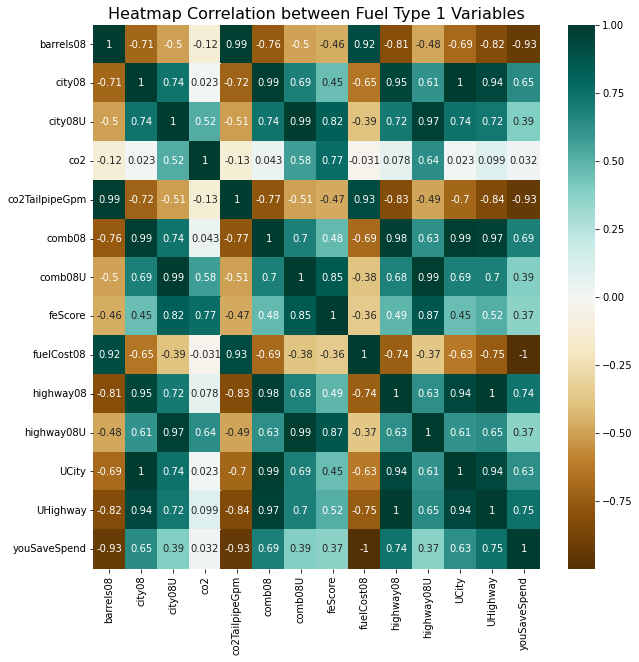

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(type1_data.corr(), center=0, cmap='BrBG', annot=True)
ax.set_title('Heatmap Correlation between Fuel Type 1 Variables', fontsize=16)

**Q2 - Which variables has strong correlation for Fuel Type 2?**

In [20]:
fuel_type2 = ['barrelsA08', 'cityA08', 'cityA08U', 'co2A', 'co2TailpipeAGpm', 'combA08', 'combA08U', 'feScore', 'fuelCostA08', 'highwayA08', 'highwayA08U', 'UCityA', 'UHighwayA', 'youSaveSpend']
fuel_type2

['barrelsA08',
 'cityA08',
 'cityA08U',
 'co2A',
 'co2TailpipeAGpm',
 'combA08',
 'combA08U',
 'feScore',
 'fuelCostA08',
 'highwayA08',
 'highwayA08U',
 'UCityA',
 'UHighwayA',
 'youSaveSpend']

In [21]:
type2_data = fuel.select(fuel_type2).toPandas()
type2_data.corr()

,barrelsA08,cityA08,co2A,co2TailpipeAGpm,combA08,combA08U,feScore,fuelCostA08,highwayA08,highwayA08U,UCityA,UHighwayA,youSaveSpend
barrelsA08,1.000000,0.486428,0.583097,0.940486,0.534229,0.424702,0.063265,0.942456,0.599732,0.473896,0.446358,0.572804,-0.036988
cityA08,0.486428,1.000000,0.207197,0.296479,0.996913,0.976130,0.196396,0.318547,0.982623,0.963506,0.997184,0.962610,0.114513
co2A,0.583097,0.207197,1.000000,0.610576,0.241918,0.250090,0.122614,0.611328,0.292511,0.306745,0.182113,0.289860,-0.016978
co2TailpipeAGpm,0.940486,0.296479,0.610576,1.000000,0.345742,0.220257,0.015281,0.997151,0.417187,0.271824,0.250370,0.399708,-0.068765
combA08,0.534229,0.996913,0.241918,0.345742,1.000000,0.972638,0.196214,0.367591,0.993956,0.967230,0.991356,0.972550,0.110921
combA08U,0.424702,0.976130,0.250090,0.220257,0.972638,1.000000,0.216008,0.243261,0.956978,0.994632,0.978950,0.939709,0.120976
feScore,0.063265,0.196396,0.122614,0.015281,0.196214,0.216008,1.000000,0.020381,0.193630,0.218426,0.198531,0.191125,0.365898
fuelCostA08,0.942456,0.318547,0.611328,0.997151,0.367591,0.243261,0.020381,1.000000,0.438510,0.294642,0.272725,0.421714,-0.065467
highwayA08,0.599732,0.982623,0.292511,0.417187,0.993956,0.956978,0.193630,0.438510,1.000000,0.961778,0.972734,0.976835,0.104337
highwayA08U,0.473896,0.963506,0.306745,0.271824,0.967230,0.994632,0.218426,0.294642,0.961778,1.000000,0.963418,0.943696,0.116696


Text(0.5, 1.0, 'Heatmap Correlation between Fuel Type 2 Variables')

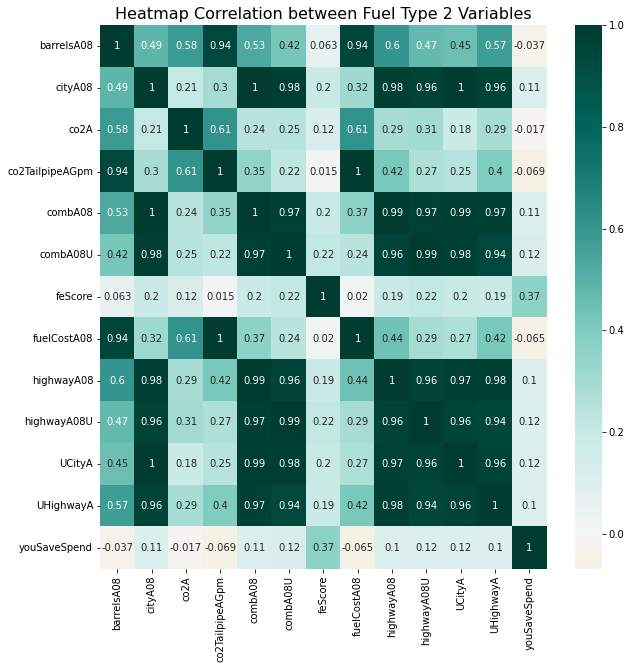

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(type2_data.corr(), center=0, cmap='BrBG', annot=True)
ax.set_title('Heatmap Correlation between Fuel Type 2 Variables', fontsize=16)

In [23]:
fuel.select("make").dropDuplicates().show()
fuel.select("make").dropDuplicates().count()

+--------------------+
|                make|
+--------------------+
|             Bertone|
|          Volkswagen|
|          Oldsmobile|
|            Sterling|
|            PAS, Inc|
|            Infiniti|
|             Peugeot|
|Lambda Control Sy...|
|Quantum Technologies|
|         Pininfarina|
|         J.K. Motors|
|               Lexus|
|              Jaguar|
|   Roush Performance|
|              Saturn|
| Ruf Automobile Gmbh|
|            Maserati|
|         Rolls-Royce|
|               Scion|
|  Saleen Performance|
+--------------------+
only showing top 20 rows



141

In [24]:
fuel.select("model").dropDuplicates().show()
fuel.select("model").dropDuplicates().count()

+--------------------+
|               model|
+--------------------+
|Caravan/Grand Car...|
|         Ferrari F50|
|              Cirrus|
|Town and Country ...|
|Tracker 2WD Conve...|
|     C230 Kompressor|
|                 MDX|
|          Armada 2WD|
|  Mariner Hybrid 4WD|
|     Sequoia 4WD FFV|
|           GT V6 2.5|
|     Tribute 4WD FFV|
|       9-3 Sedan AWD|
|          458 Spider|
|                RS 7|
|Yukon Denali K10 AWD|
|Safari 2WD (passe...|
|        Ferrari F355|
|  CLK320 (Cabriolet)|
|                 944|
+--------------------+
only showing top 20 rows



4589

In [25]:
fuel.select("fuelType2").dropDuplicates().show()

+-----------+
|  fuelType2|
+-----------+
|Electricity|
|Natural Gas|
|       null|
|        E85|
|    Propane|
+-----------+



**Q3 - Which car manufacturer that manufacturing dual fuel vehicles the most?**

In [26]:
fuel.na.drop(subset=["fuelType2"]).show(truncate=False)

+------------------+-------------------+---------+---------+------+-------+-------+--------+------+-----+------+----+----+------------------+------------------+------+-------+-------+--------+-----+----------+----------+---------+-----+--------------------------+-----+---------+-------+----------+-----------+-----------------------+----------------+--------+---------+---------+----------+----------+-----------+---------+--------+---------+---+---+-------+---+----+---------+---------------------------------------+-------+-----------+---+-----+-----+---------+----------+--------+---------+---------------+-------+-------+--------+---------+---------------------------+----+------------+-------+----------+--------+--------+------------+-----------+------+-------+-------+--------+----------+---------+----------------------------+----------------------------+---------+--------+-------+--------+
|barrels08         |barrelsA08         |charge120|charge240|city08|city08U|cityA08|cityA08U|cityCD|

In [27]:
fuel.na.drop(subset=["fuelType2"]).count()

1789

In [28]:
fuel2_maker = fuel.select('make', 'fuelType2').na.drop(subset=["fuelType2"])

In [29]:
fuel2_maker.count()

1789

In [30]:
fuel2_maker_pd = fuel2_maker.toPandas()
fuel2_maker_pd

,make,fuelType2
0,Chevrolet,Natural Gas
1,Ford,E85
2,Ford,E85
3,Ford,E85
4,Ford,E85
...,...,...
1784,Lincoln,Electricity
1785,Ferrari,Electricity
1786,Toyota,Electricity
1787,Ford,E85


In [31]:
pie_data = fuel2_maker_pd.groupby('make').count()

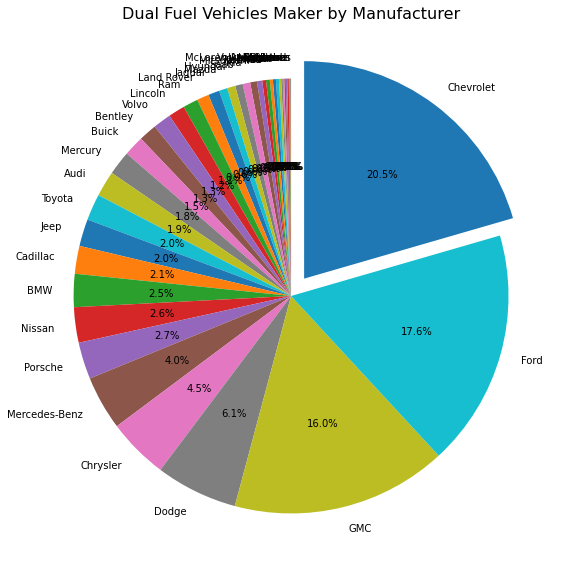

In [32]:
pie_label = pie_data.fuelType2.sort_values().index
pie_value = pie_data.fuelType2.sort_values()

explode_data = np.array(pie_value)
explode = np.zeros(len(explode_data))
explode[explode_data.argmax()] = 0.1

plt.figure(figsize=(10,10))
plt.pie(pie_value, labels=pie_label, startangle=90, autopct='%.1f%%', explode=explode)
plt.title('Dual Fuel Vehicles Maker by Manufacturer', fontsize=16)
plt.show()

**Q4 - When was the earliest year where dual fuel vehicles are made?**

In [33]:
fuel2_year = fuel.select('year', 'fuelType2')

In [34]:
fuel2_year_pd = fuel2_year.toPandas()
fuel2_year_pd

,year,fuelType2
0,1985,None
1,1985,None
2,1985,None
3,1985,None
4,1993,None
...,...,...
44663,1993,None
44664,1993,None
44665,1993,None
44666,1993,None


In [35]:
line_data = fuel2_year_pd.groupby('year').count()
line_data

,fuelType2
year,
1984,0
1985,0
1986,0
1987,0
1988,0
1989,0
1990,0
1991,0
1992,0


In [36]:
values = line_data['fuelType2']

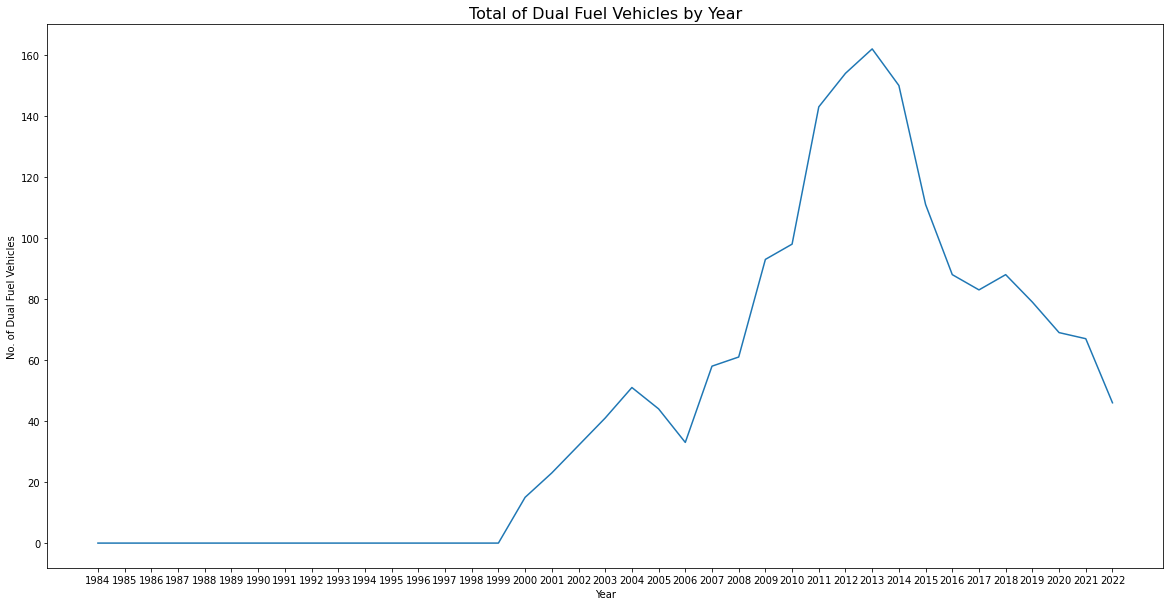

In [37]:
plt.figure(figsize=(20,10))
plt.plot(values)
plt.title('Total of Dual Fuel Vehicles by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('No. of Dual Fuel Vehicles')

plt.show()

**Q5 - What is the relationship between vehicles engine displacement in litres and the fuel efficiency of both single fuel and dual fuel vehicles?**

In [38]:
fuel_hwy1 = fuel.select('displ', 'highway08')
fuel_hwy2 = fuel.select('displ', 'highwayA08', 'fuelType2').na.drop(subset=["fuelType2"])

In [39]:
fuel_hwy1_pd = fuel_hwy1.toPandas()
fuel_hwy1_pd

,displ,highway08
0,2.0,25.0
1,4.9,14.0
2,2.2,33.0
3,5.2,12.0
4,2.2,23.0
...,...,...
44663,2.2,26.0
44664,2.2,28.0
44665,2.2,24.0
44666,2.2,24.0


In [40]:
fuel_hwy2_pd = fuel_hwy2.toPandas()
fuel_hwy2_pd

,displ,highwayA08,fuelType2
0,2.2,25.0,Natural Gas
1,3.0,19.0,E85
2,3.0,18.0,E85
3,3.0,15.0,E85
4,3.0,16.0,E85
...,...,...,...
1784,2.5,72.0,Electricity
1785,3.9,51.0,Electricity
1786,2.5,84.0,Electricity
1787,3.5,14.0,E85


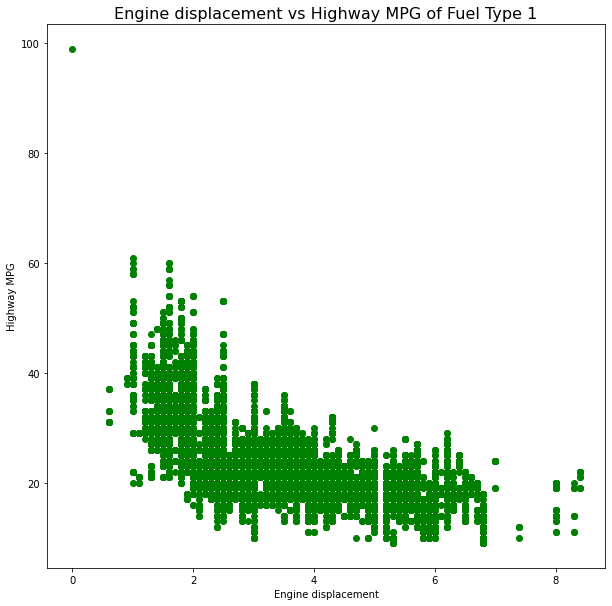

In [41]:
x = fuel_hwy1_pd['displ']
y = fuel_hwy1_pd['highway08']

plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='green')
plt.xlabel("Engine displacement")
plt.ylabel("Highway MPG")
plt.title("Engine displacement vs Highway MPG of Fuel Type 1", fontsize=16)

plt.show()

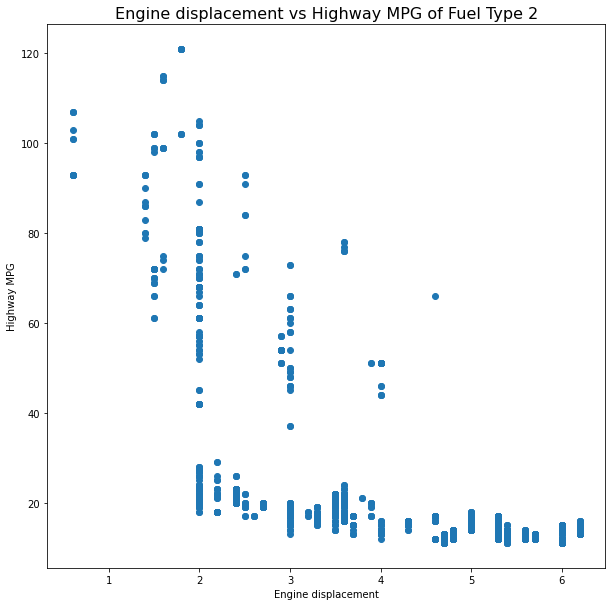

In [42]:
x = fuel_hwy2_pd['displ']
y = fuel_hwy2_pd['highwayA08']

plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.xlabel("Engine displacement")
plt.ylabel("Highway MPG")
plt.title("Engine displacement vs Highway MPG of Fuel Type 2", fontsize=16)

plt.show()

**Q6 - Does dual fuel vehicle drivers save more than the single fuel vehicle drivers?**

In [43]:
fuel1_saving = fuel.select('fuelType1', 'youSaveSpend').filter(fuel.fuelType2.isNull())
fuel1_saving.show()

+----------------+------------+
|       fuelType1|youSaveSpend|
+----------------+------------+
|Regular Gasoline|     -2500.0|
|Regular Gasoline|    -13250.0|
|Regular Gasoline|         0.0|
|Regular Gasoline|    -13250.0|
|Premium Gasoline|     -6750.0|
|Regular Gasoline|     -2000.0|
|Regular Gasoline|      -750.0|
|Regular Gasoline|     -1000.0|
|Regular Gasoline|      -250.0|
|Regular Gasoline|      -750.0|
|Regular Gasoline|      -250.0|
|Regular Gasoline|     -2500.0|
|Regular Gasoline|     -1000.0|
|Regular Gasoline|     -2500.0|
|Regular Gasoline|     -9750.0|
|Regular Gasoline|     -1500.0|
|Regular Gasoline|     -3250.0|
|Regular Gasoline|     -2500.0|
|Premium Gasoline|     -6750.0|
|Premium Gasoline|     -6750.0|
+----------------+------------+
only showing top 20 rows



In [44]:
fuel1_saving.select("fuelType1").dropDuplicates().show()

+-----------------+
|        fuelType1|
+-----------------+
| Premium Gasoline|
|      Electricity|
|      Natural Gas|
|           Diesel|
|Midgrade Gasoline|
| Regular Gasoline|
+-----------------+



In [45]:
fuel1_saving_pd = fuel1_saving.toPandas()
fuel1_saving_pd

,fuelType1,youSaveSpend
0,Regular Gasoline,-2500.0
1,Regular Gasoline,-13250.0
2,Regular Gasoline,0.0
3,Regular Gasoline,-13250.0
4,Premium Gasoline,-6750.0
...,...,...
42874,Regular Gasoline,-2000.0
42875,Regular Gasoline,-1500.0
42876,Regular Gasoline,-2500.0
42877,Regular Gasoline,-2500.0


In [46]:
avgfuel1_saving = fuel1_saving_pd.groupby('fuelType1').mean()
avgfuel1_saving

,youSaveSpend
fuelType1,
Diesel,-3279.244517
Electricity,5711.756374
Midgrade Gasoline,-6753.521127
Natural Gas,-2029.166667
Premium Gasoline,-6751.818871
Regular Gasoline,-3596.790092


In [47]:
# X = list(avgfuel1_saving.iloc[:, 0])
# Y = list(avgfuel1_saving.iloc[:, 1])

# X = avgfuel1_saving['fuelType1']
# Y = avgfuel1_saving['youSaveSpend']

# plt.figure(figsize=(17,10))
# width = 0.9 

# plt.bar(x, y, width)
# plt.xlabel('Single Fuel Type')
# plt.ylabel('youSaveSpend')
# plt.title('Saving/Spending based on Single Fuel Type', fontsize = 18)
# plt.show()

In [48]:
fuel2_saving = fuel.select('fuelType1', 'fuelType2', 'youSaveSpend').na.drop(subset=["fuelType2"])
fuel2_saving.show()

+----------------+-----------+------------+
|       fuelType1|  fuelType2|youSaveSpend|
+----------------+-----------+------------+
|Regular Gasoline|Natural Gas|     -2000.0|
|Regular Gasoline|        E85|     -3250.0|
|Regular Gasoline|        E85|     -3250.0|
|Regular Gasoline|        E85|     -5250.0|
|Regular Gasoline|        E85|     -4500.0|
|Regular Gasoline|        E85|     -5250.0|
|Regular Gasoline|        E85|     -4500.0|
|Regular Gasoline|        E85|     -7250.0|
|Regular Gasoline|        E85|     -5250.0|
|Regular Gasoline|        E85|     -7250.0|
|Regular Gasoline|        E85|     -7250.0|
|Regular Gasoline|        E85|     -5250.0|
|Regular Gasoline|        E85|     -3750.0|
|Regular Gasoline|        E85|     -3750.0|
|Regular Gasoline|        E85|     -4500.0|
|Regular Gasoline|Natural Gas|     -1500.0|
|Regular Gasoline|        E85|     -3750.0|
|Regular Gasoline|        E85|     -3750.0|
|Regular Gasoline|        E85|     -2000.0|
|Regular Gasoline|        E85|  

In [49]:
fuel2_saving.select("fuelType1").dropDuplicates().show()

+----------------+
|       fuelType1|
+----------------+
|Premium Gasoline|
|Regular Gasoline|
+----------------+



In [50]:
fuel2_saving_pd = fuel2_saving.toPandas()
fuel2_saving_pd

,fuelType1,fuelType2,youSaveSpend
0,Regular Gasoline,Natural Gas,-2000.0
1,Regular Gasoline,E85,-3250.0
2,Regular Gasoline,E85,-3250.0
3,Regular Gasoline,E85,-5250.0
4,Regular Gasoline,E85,-4500.0
...,...,...,...
1784,Regular Gasoline,Electricity,3500.0
1785,Premium Gasoline,Electricity,-5500.0
1786,Regular Gasoline,Electricity,4750.0
1787,Regular Gasoline,E85,-6250.0


In [51]:
fuel2_saving_pd['dualFuelType'] = fuel2_saving_pd['fuelType1'] + '-' + fuel2_saving_pd['fuelType2']
fuel2_saving_pd

,fuelType1,fuelType2,youSaveSpend,dualFuelType
0,Regular Gasoline,Natural Gas,-2000.0,Regular Gasoline-Natural Gas
1,Regular Gasoline,E85,-3250.0,Regular Gasoline-E85
2,Regular Gasoline,E85,-3250.0,Regular Gasoline-E85
3,Regular Gasoline,E85,-5250.0,Regular Gasoline-E85
4,Regular Gasoline,E85,-4500.0,Regular Gasoline-E85
...,...,...,...,...
1784,Regular Gasoline,Electricity,3500.0,Regular Gasoline-Electricity
1785,Premium Gasoline,Electricity,-5500.0,Premium Gasoline-Electricity
1786,Regular Gasoline,Electricity,4750.0,Regular Gasoline-Electricity
1787,Regular Gasoline,E85,-6250.0,Regular Gasoline-E85


In [52]:
avgfuel2_saving = fuel2_saving_pd.groupby('dualFuelType').mean()
avgfuel2_saving

,youSaveSpend
dualFuelType,
Premium Gasoline-E85,-6314.960630
Premium Gasoline-Electricity,50.824176
Regular Gasoline-E85,-5255.288111
Regular Gasoline-Electricity,4277.777778
Regular Gasoline-Natural Gas,-8612.500000
Regular Gasoline-Propane,-9375.000000


In [53]:
# X = list(avgfuel2_saving['dualFuelType'])
# Y = list(avgfuel2_saving['youSaveSpend'])

# plt.figure(figsize=(17,10))

# plt.bar(X, Y)
# plt.xlabel('Dual Fuel Type')
# plt.ylabel('youSaveSpend')
# plt.title('Saving/Spending based on Dual Fuel Type', fontsize = 18)
# plt.show()